In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [50]:
train = pd.read_csv("train.csv")

In [51]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test = pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
L = np.sqrt(784)
L

28.0

In [54]:
def plotNum(ind):
    plt.imshow(np.reshape(np.array(train.iloc[ind,1:]),(28, 28)), cmap = "gray")

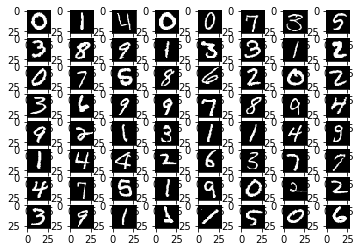

In [55]:
plt.figure()
for ii in range(1, 65):
    plt.subplot(8, 8, ii)
    plotNum(ii)

In [56]:
x = train.drop("label", 1)
y = train["label"]

In [57]:
rfc = RandomForestClassifier(n_jobs = -1, n_estimators = 50)

In [58]:
rfc.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
rfc.score(x, y)

0.9999761904761905

In [60]:
yOutput = rfc.predict(test)

In [61]:
yOutput

array([2, 0, 9, ..., 3, 9, 2])

In [75]:
predictions = pd.DataFrame(yOutput, columns = ['Label'])
predictions.reset_index(inplace = True)
predictions['index'] = predictions['index'] + 1
predictions.rename(columns = {'index' : 'ImageId'}, inplace = True)

In [76]:
predictions.to_csv("DigitRecogniserSubmission.csv", index = False)

In [77]:
result = pd.read_csv("DigitRecogniserSubmission.csv")
result

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
